<a href="https://colab.research.google.com/github/Pree-om/human_action_detection/blob/main/HumanActionDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Human Action Detection**

Step 1: Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm

In [4]:
from sklearn.metrics import classification_report, r2_score

Step 2: Data Importing & Analysis

In [5]:
import kagglehub
import pandas as pd
import os

# Download latest version
path = kagglehub.dataset_download("gaurav2022/mobile-health")

print("Path to dataset files:", path)

# Find the CSV file within the downloaded folder
for file in os.listdir(path):
    if file.endswith(".csv"):
        csv_file_path = os.path.join(path, file)
        break

# Read the CSV file
df = pd.read_csv(csv_file_path)

df

100%|██████████| 35.5M/35.5M [00:00<00:00, 99.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/gaurav2022/mobile-health/versions/1


alx     aly      alz       glx      gly      glz     arx     ary  \
0        2.1849 -9.6967  0.63077  0.103900 -0.84053 -0.68762 -8.6499 -4.5781   
1        2.3876 -9.5080  0.68389  0.085343 -0.83865 -0.68369 -8.6275 -4.3198   
2        2.4086 -9.5674  0.68113  0.085343 -0.83865 -0.68369 -8.5055 -4.2772   
3        2.1814 -9.4301  0.55031  0.085343 -0.83865 -0.68369 -8.6279 -4.3163   
4        2.4173 -9.3889  0.71098  0.085343 -0.83865 -0.68369 -8.7008 -4.1459   
...         ...     ...      ...       ...      ...      ...     ...     ...   
1215740  1.7849 -9.8287  0.29725 -0.341370 -0.90056 -0.61493 -3.7198 -8.9071   
1215741  1.8687 -9.8766  0.46236 -0.341370 -0.90056 -0.61493 -3.7160 -8.7455   
1215742  1.6928 -9.9290  0.16631 -0.341370 -0.90056 -0.61493 -3.8824 -9.1155   
1215743  1.5279 -9.6306  0.30458 -0.341370 -0.90056 -0.61493 -3.5564 -9.1441   
1215744  1.6614 -9.8398  0.18088 -0.332100 -0.90432 -0.61886 -3.9035 -8.9324   

              arz       grx      gry       grz  Activity    subject  
0        0.187760 -0.449020 -1.01030  0.034483         0   subject1  
1        0.023595 -0.449020 -1.01030  0.034483         0   subject1  
2        0.275720 -0.449020 -1.01030  0.034483         0   subject1  
3        0.367520 -0.456860 -1.00820  0.025862         0   subject1  
4        0.407290 -0.456860 -1.00820  0.025862         0   subject1  
...           ...       ...      ...       ...       ...        ...  
1215740  0.294230  0.041176 -0.99384 -0.480600         0  subject10  
1215741  0.448140  0.041176 -0.99384 -0.480600         0  subject10  
1215742  0.450480  0.041176 -0.99384 -0.480600         0  subject10  
1215743  0.594880  0.041176 -0.99384 -0.480600         0  subject10  
1215744  0.761710  0.035294 -1.02050 -0.471980         0  subject10  

[1215745 rows x 14 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215745 entries, 0 to 1215744
Data columns (total 14 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   alx       1215745 non-null  float64
 1   aly       1215745 non-null  float64
 2   alz       1215745 non-null  float64
 3   glx       1215745 non-null  float64
 4   gly       1215745 non-null  float64
 5   glz       1215745 non-null  float64
 6   arx       1215745 non-null  float64
 7   ary       1215745 non-null  float64
 8   arz       1215745 non-null  float64
 9   grx       1215745 non-null  float64
 10  gry       1215745 non-null  float64
 11  grz       1215745 non-null  float64
 12  Activity  1215745 non-null  int64  
 13  subject   1215745 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 129.9+ MB


In [7]:
df.describe().T

count      mean       std      min       25%       50%  \
alx       1215745.0  1.494200  3.826485 -22.1460   0.14131  1.308900   
aly       1215745.0 -9.692878  4.171303 -19.6190 -10.20100 -9.670300   
alz       1215745.0 -0.954806  5.461803 -19.3730  -2.64940 -0.016456   
glx       1215745.0 -0.001599  0.491217  -2.1466  -0.43599 -0.014842   
gly       1215745.0 -0.616632  0.354641  -7.7899  -0.81801 -0.707320   
glz       1215745.0 -0.158781  0.546798  -2.6267  -0.59332 -0.190570   
arx       1215745.0 -3.713413  4.763586 -22.3610  -6.07600 -2.977600   
ary       1215745.0 -5.805526  5.757639 -18.9720  -9.40420 -7.461500   
arz       1215745.0  2.393880  3.876503 -18.2390   0.12965  1.928100   
grx       1215745.0 -0.276106  0.527689  -8.3392  -0.70588 -0.354900   
gry       1215745.0 -0.466434  0.555551  -3.5708  -0.89733 -0.634500   
grz       1215745.0  0.266633  0.564380  -2.6897  -0.23707  0.301720   
Activity  1215745.0  1.741465  3.283679   0.0000   0.00000  0.000000   

               75%      max  
alx       2.575800  20.0540  
aly      -9.042200  21.1610  
alz       1.301300  25.0150  
glx       0.448980  60.4840  
gly      -0.540340   2.0113  
glz       0.322200   2.7701  
arx      -1.193700  19.8640  
ary      -2.533900  22.1910  
arz       4.914700  25.7410  
grx       0.096078   3.3196  
gry      -0.106780   1.5565  
grz       0.778020   2.7500  
Activity  2.000000  12.0000

In [8]:
df.isnull().sum()

alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64

<Axes: xlabel='Activity'>

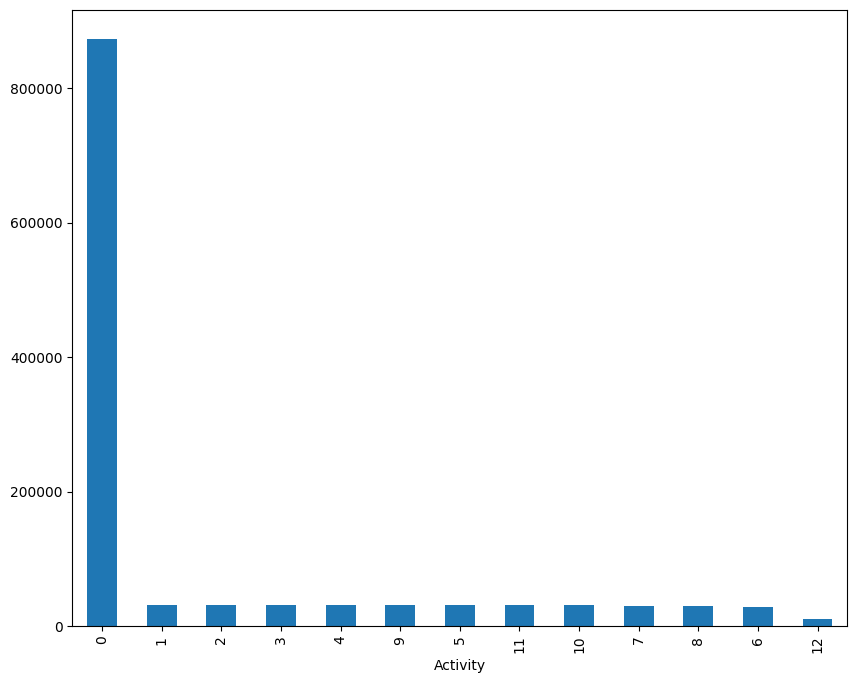

In [9]:
plt.figure(figsize=(10,8))
df['Activity'].value_counts().plot.bar()

In [10]:
data_activity_0 = df[df['Activity'] == 0]
data_activity_else = df[df['Activity'] != 0]

In [11]:
data_activity_0 = data_activity_0.sample(n=40000)
df= pd.concat([data_activity_0, data_activity_else])

<Axes: xlabel='Activity'>

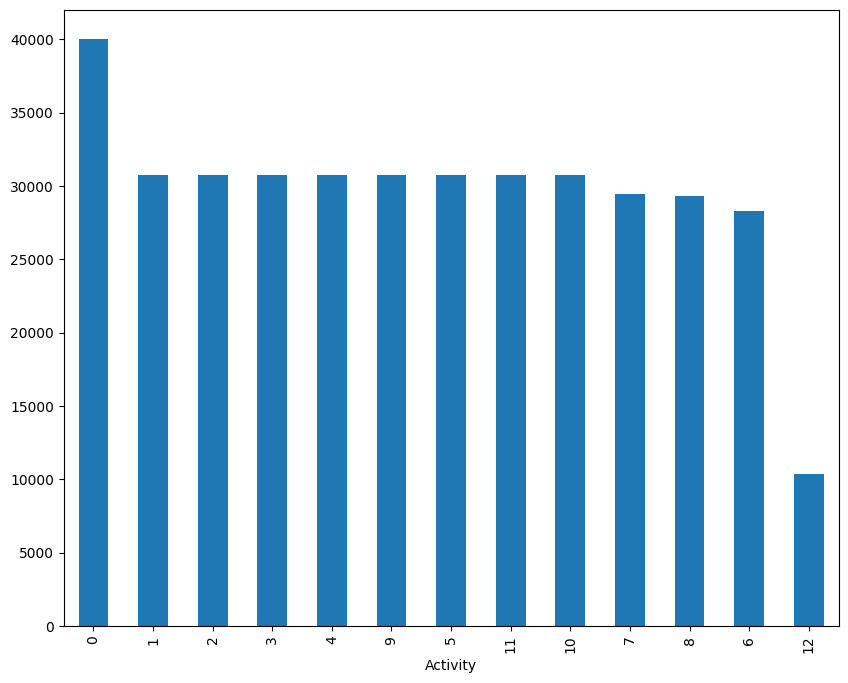

In [12]:
plt.figure(figsize=(10,8))
df['Activity'].value_counts().plot.bar()

In [13]:
len(df)

383195

In [14]:
activity_label = {

  0: "None",

  1: "Standing still (1 min)",

  2: "Sitting and relaxing (1 min)",

  3: "Lying down (1 min)",

  4: "walking (1 min)",

  5: "Climbing stairs (1 min)",

  6: "Waist bends forward (20x)",

  7: "Frontal elevation of arms (20x)",

  8: "Knees bending (crouching) (20x)",

  9: "Cycling (1 min)",

  10: "Jogging (1 min)",

  11: "Running (1 min)",

  12: "Jump front & back (20x)"

}

======================Standing still (1 min)-a=========================


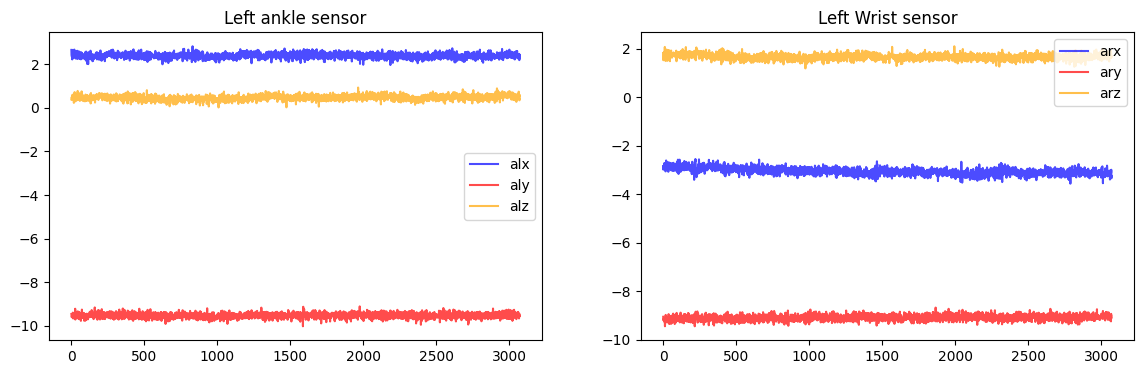

======================Standing still (1 min)-g=========================


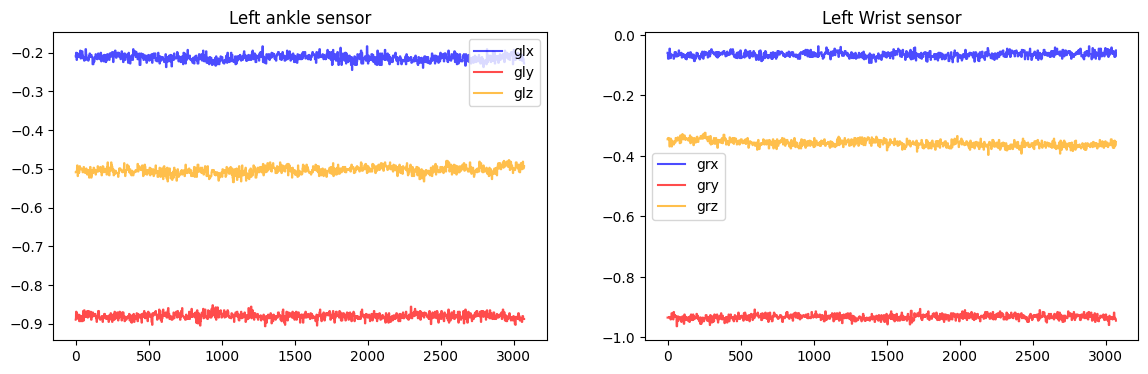

======================Sitting and relaxing (1 min)-a=========================


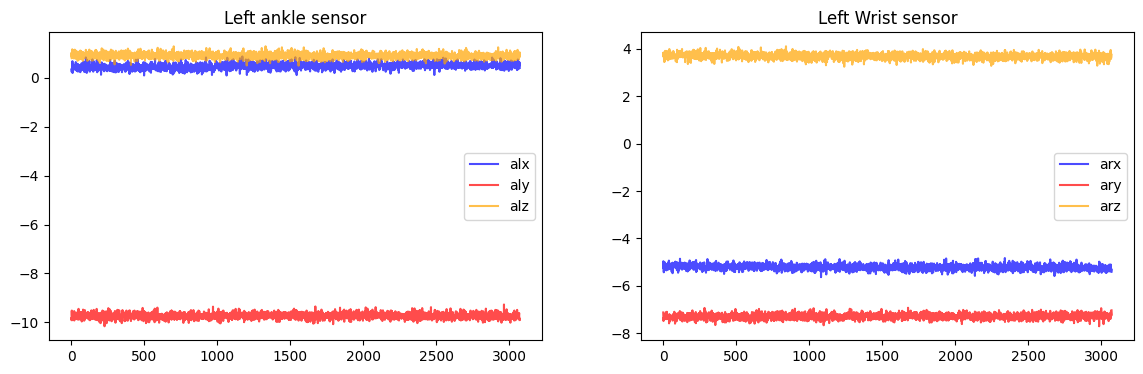

======================Sitting and relaxing (1 min)-g=========================


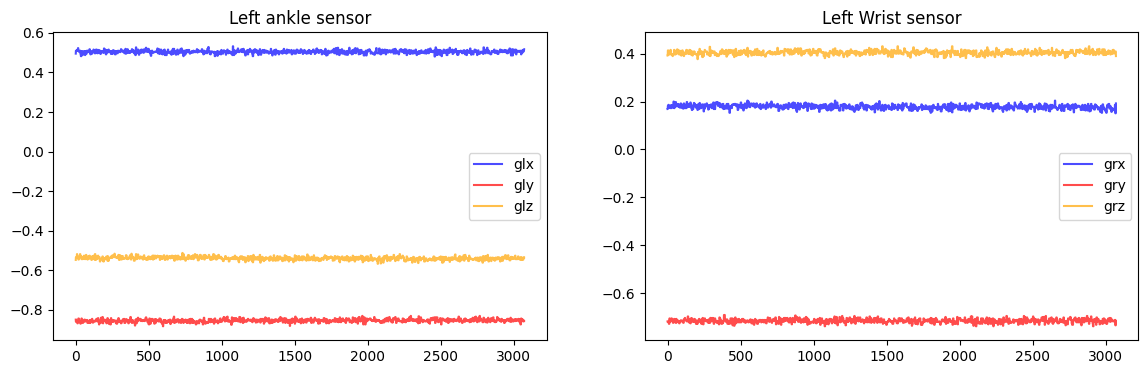

======================Lying down (1 min)-a=========================


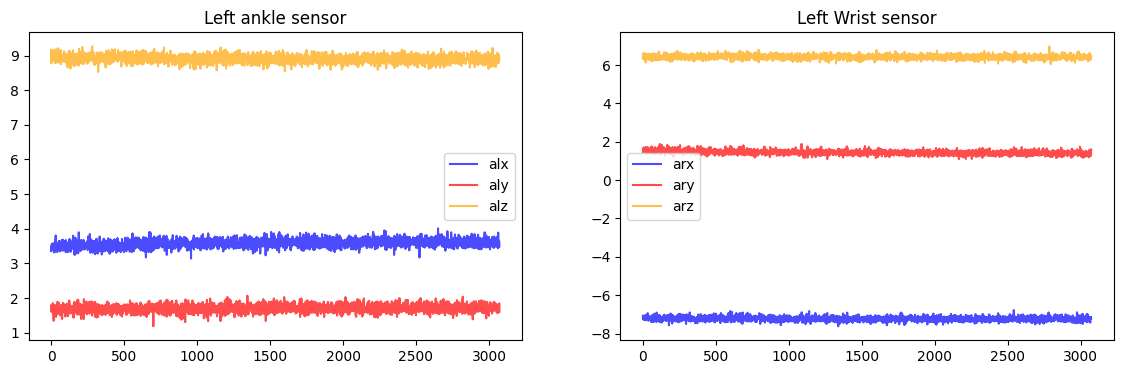

======================Lying down (1 min)-g=========================


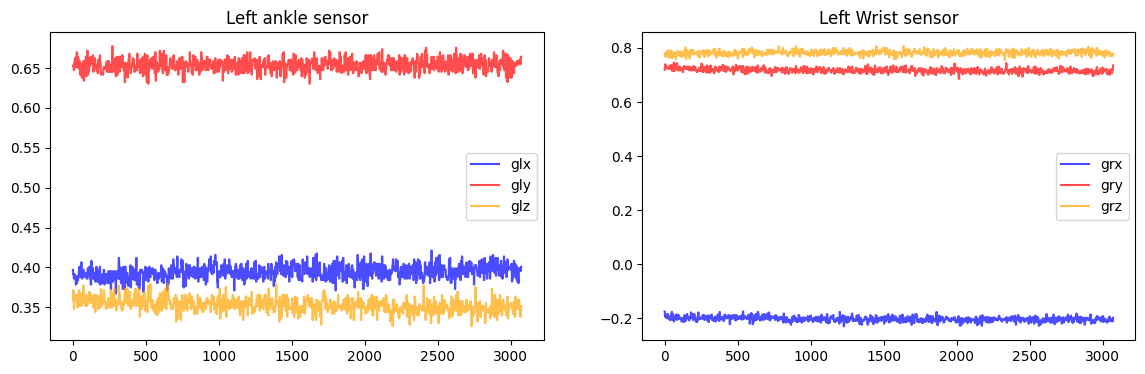

======================walking (1 min)-a=========================


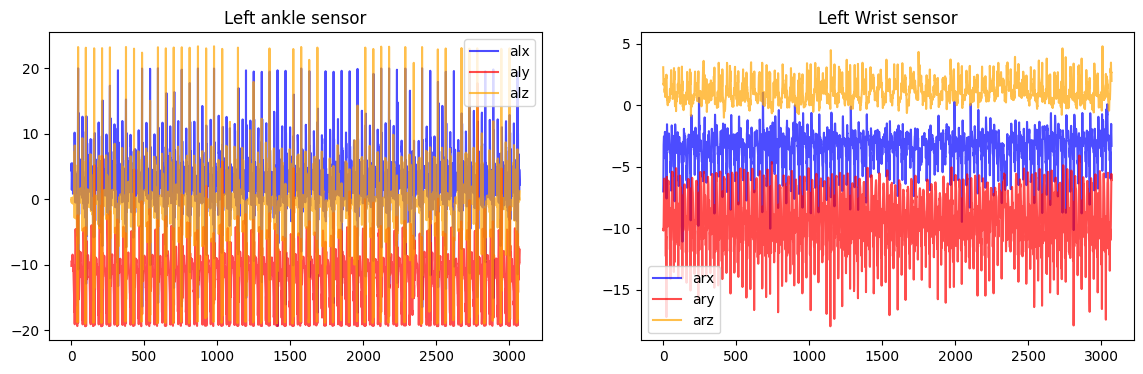

======================walking (1 min)-g=========================


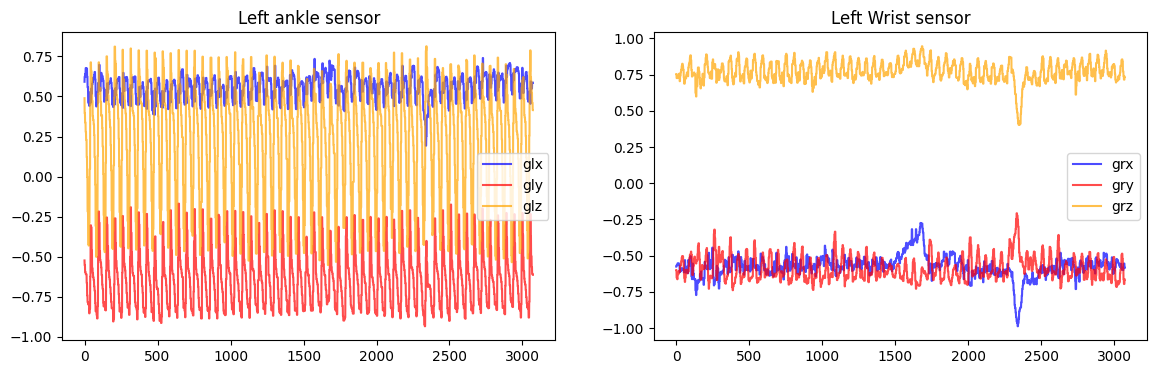

======================Climbing stairs (1 min)-a=========================


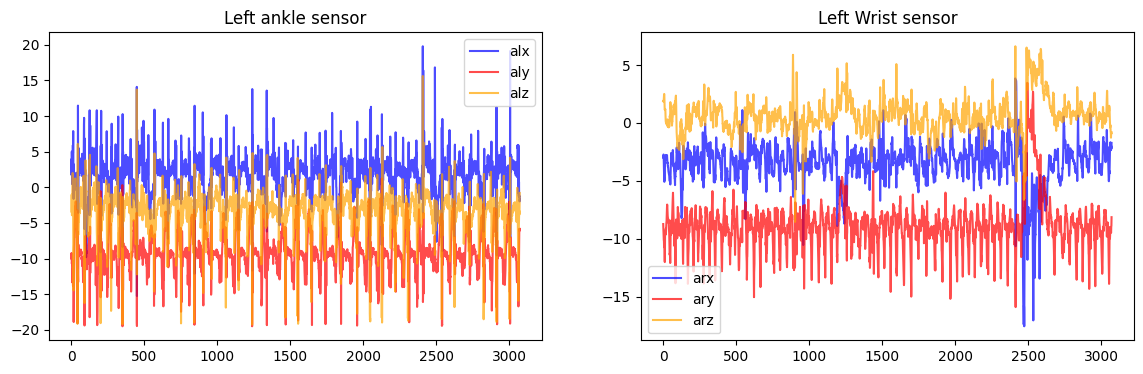

======================Climbing stairs (1 min)-g=========================


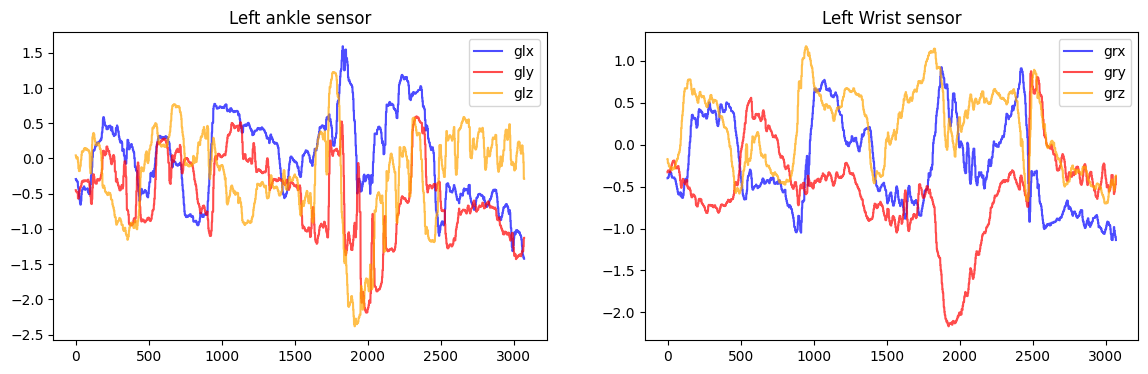

======================Waist bends forward (20x)-a=========================


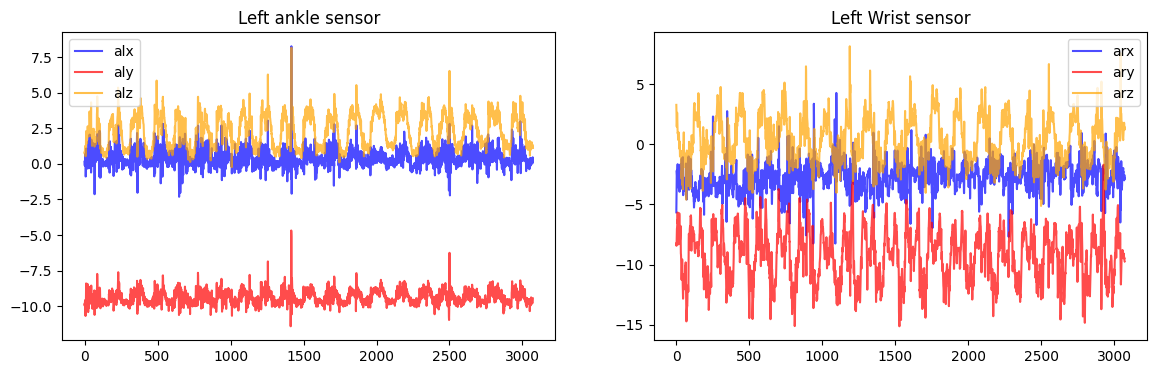

======================Waist bends forward (20x)-g=========================


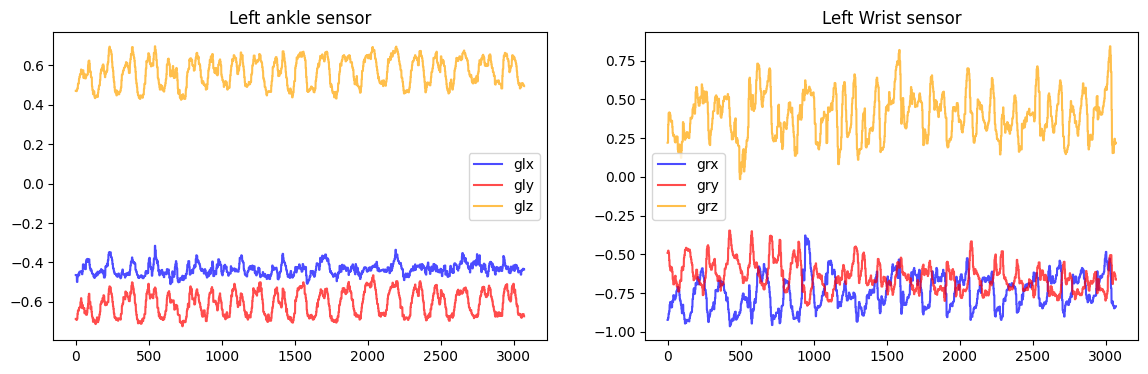

======================Frontal elevation of arms (20x)-a=========================


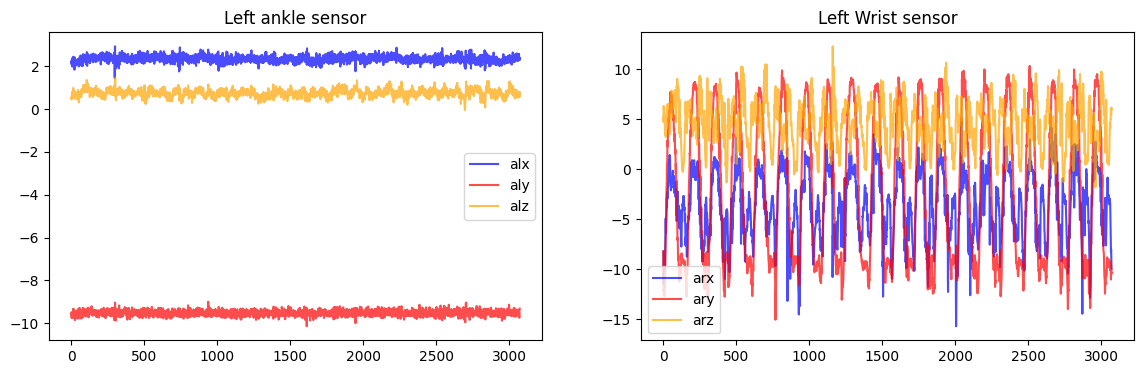

======================Frontal elevation of arms (20x)-g=========================


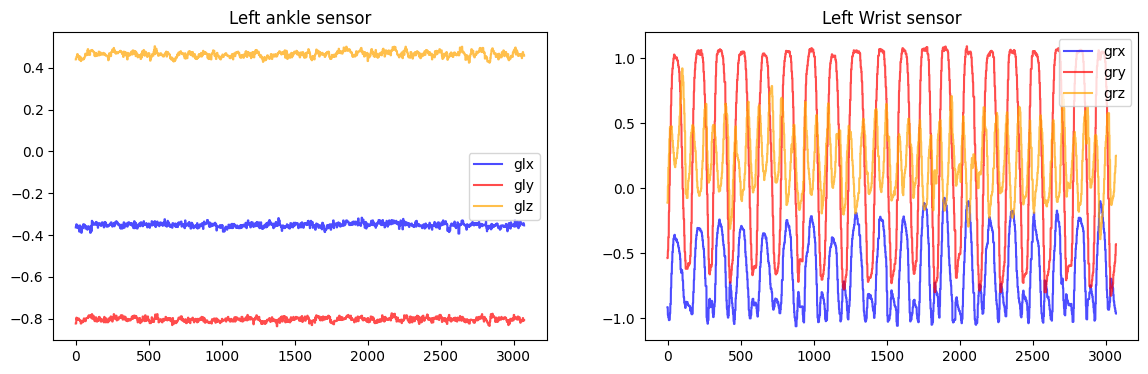

======================Knees bending (crouching) (20x)-a=========================


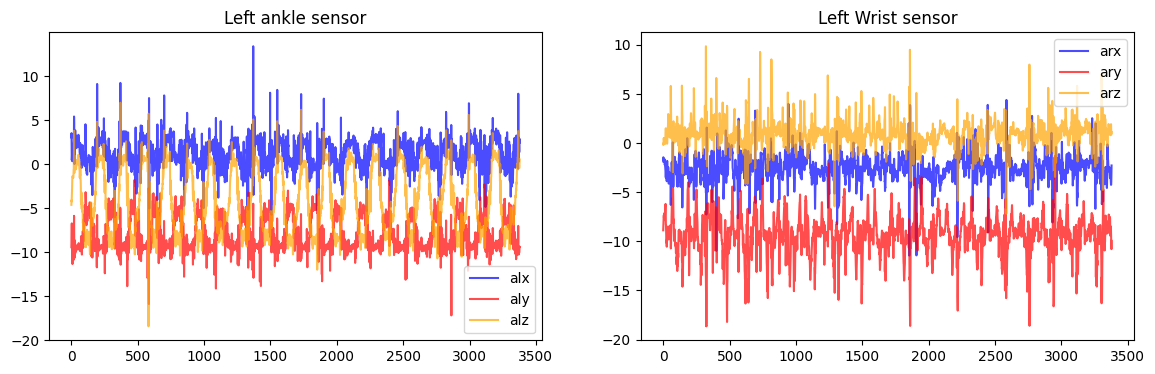

======================Knees bending (crouching) (20x)-g=========================


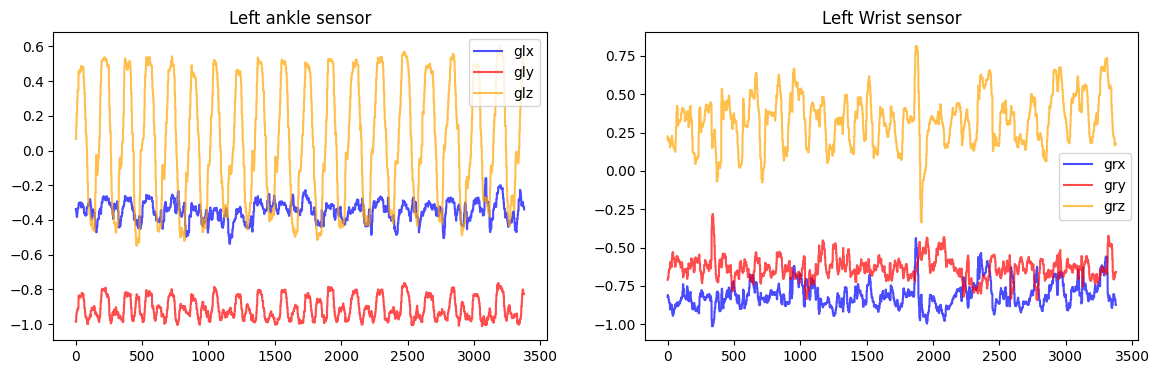

======================Cycling (1 min)-a=========================


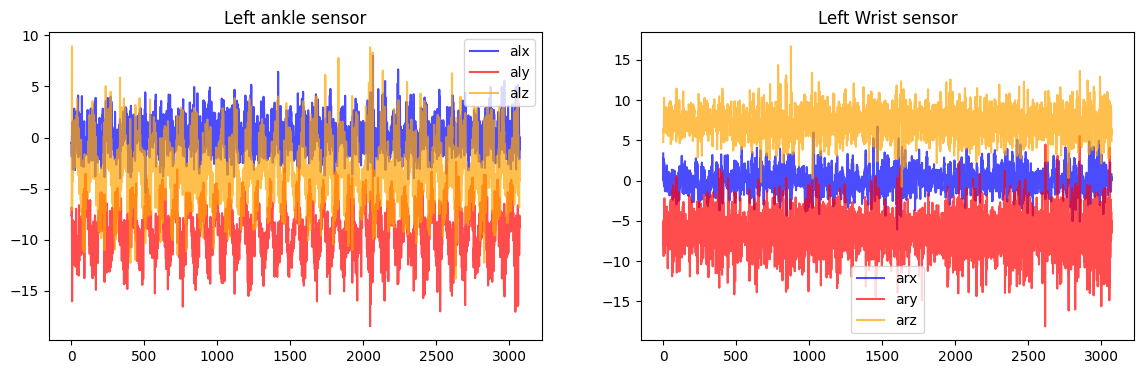

======================Cycling (1 min)-g=========================


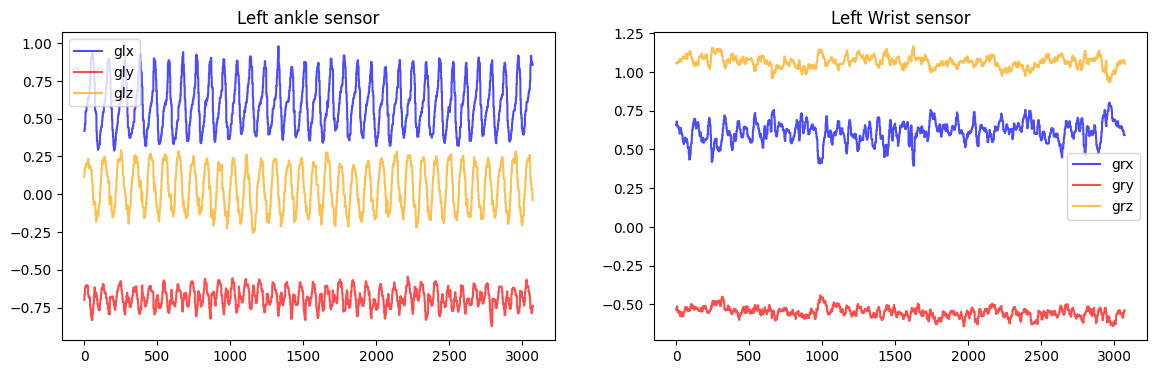

======================Jogging (1 min)-a=========================


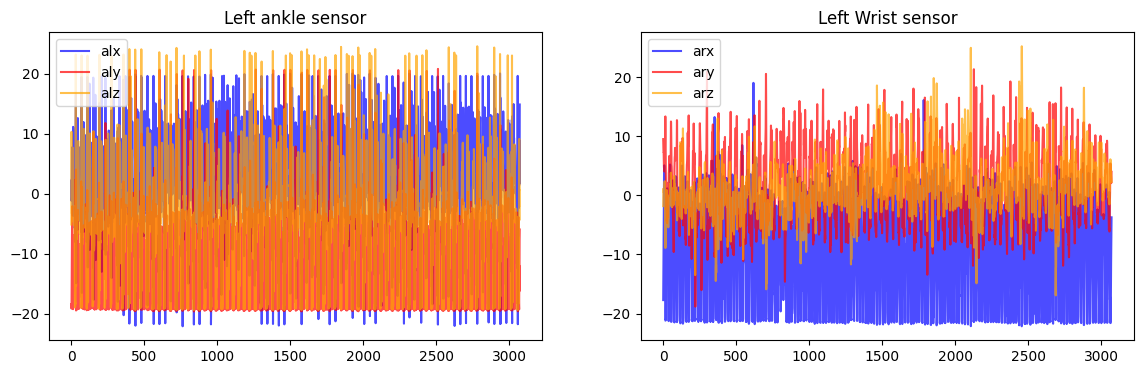

======================Jogging (1 min)-g=========================


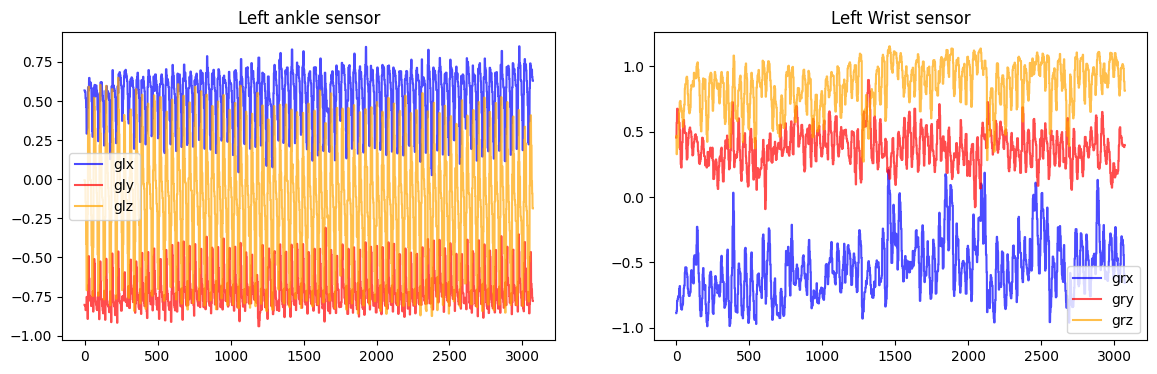

======================Running (1 min)-a=========================


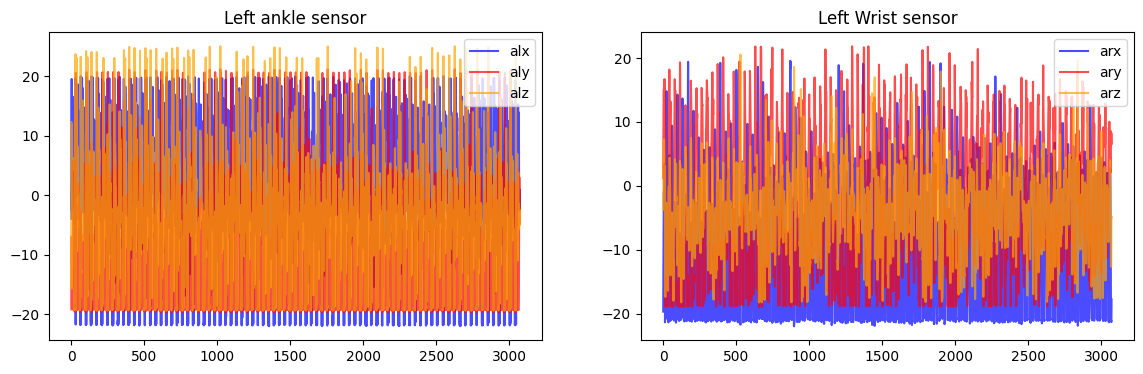

======================Running (1 min)-g=========================


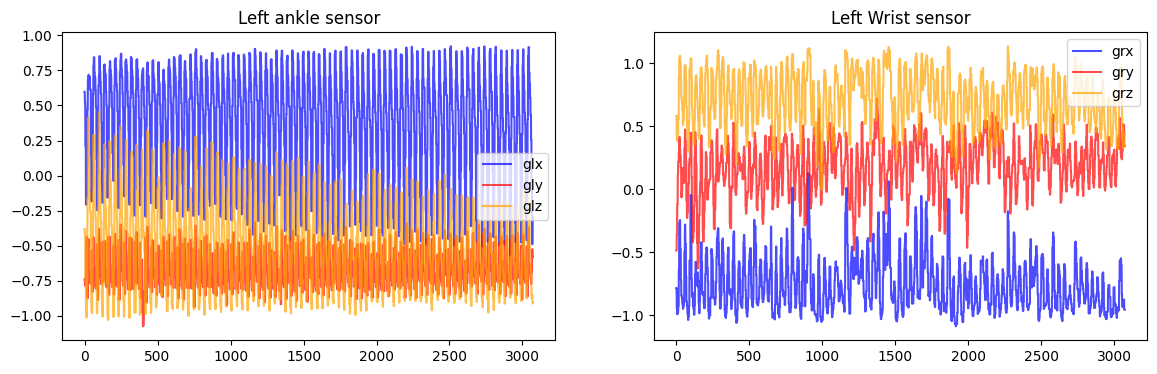

======================Jump front & back (20x)-a=========================


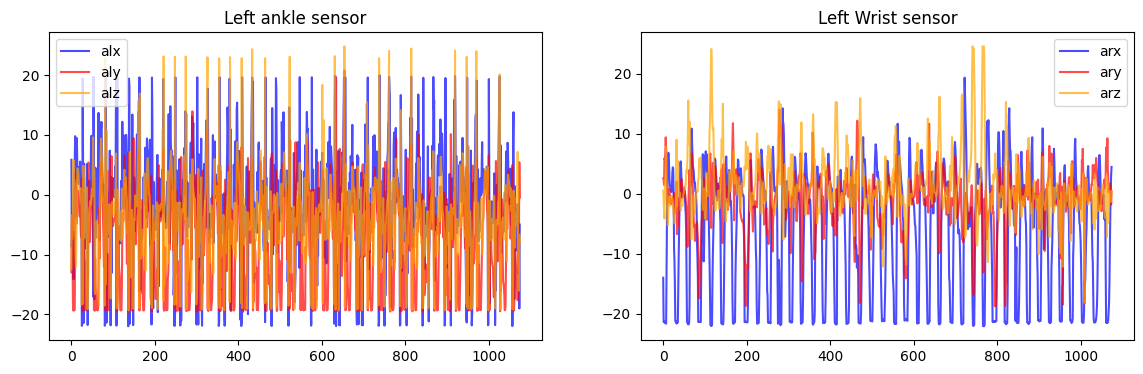

======================Jump front & back (20x)-g=========================


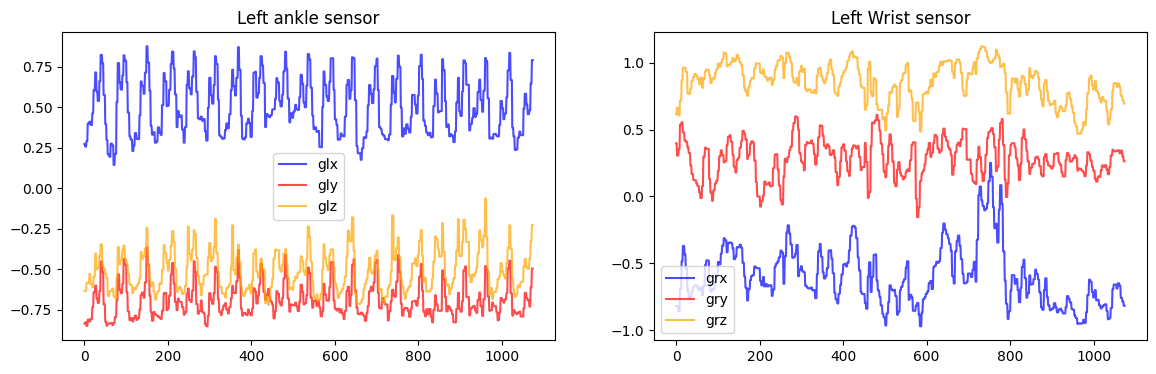

In [15]:
subject1 = df[df['subject'] == 'subject1']
readings = ['a', 'g']
for i in range(1,13):
  for r in readings:
    print(f"======================{activity_label[i]}-{r}=========================")

    plt.figure(figsize=(14,4))

    plt.subplot(1,2,1)

    plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True) [r+ "lx"],
             color = "blue", alpha=0.7, label = r + "lx")

    plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True) [r+ "ly"],
             color = 'red', alpha = 0.7, label = r+ "ly")

    plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True) [r+ "lz"],
             color = 'orange', alpha=0.7, label = r+ "lz")

    plt.title("Left ankle sensor")

    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True) [r+ "rx"],
             color = "blue", alpha=0.7, label = r + "rx")

    plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True) [r+ "ry"],
             color = 'red', alpha = 0.7, label = r+ "ry")

    plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True) [r+ "rz"],
             color = 'orange', alpha=0.7, label = r+ "rz")

    plt.title("Left Wrist sensor")

    plt.legend()
    plt.show()

-------------------Standing still (1 min) - a-------------------


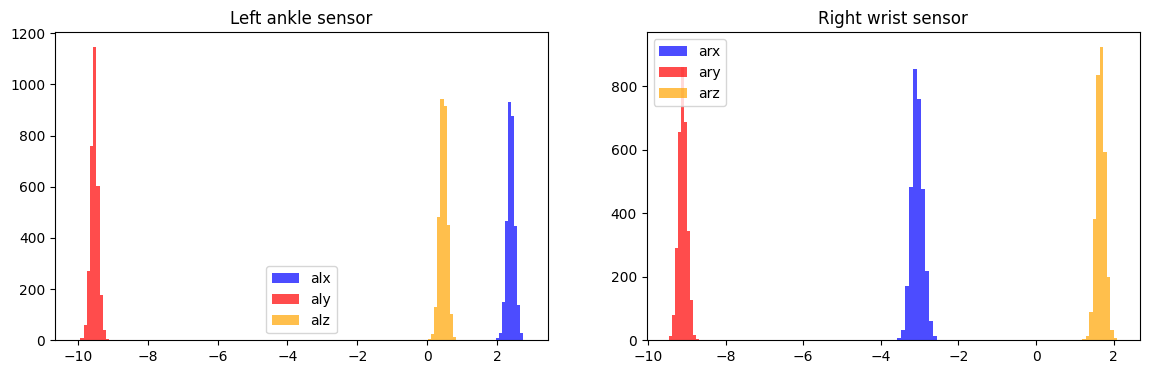

-------------------Standing still (1 min) - g-------------------


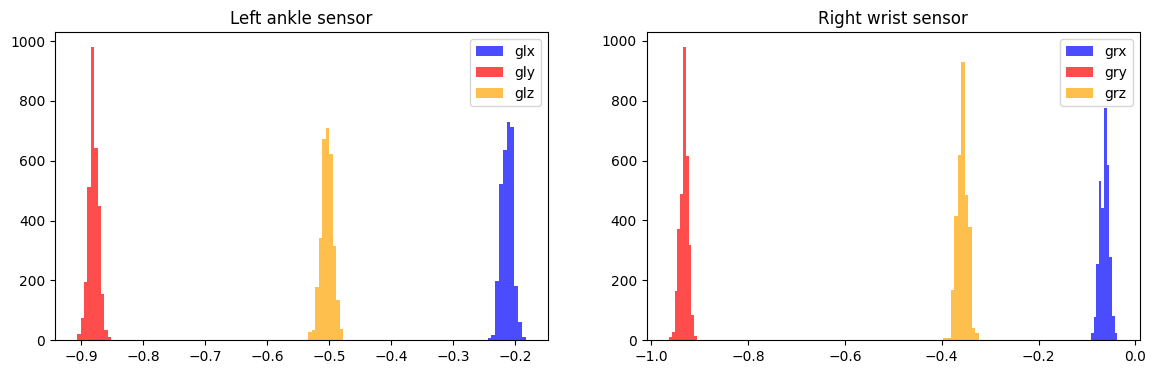

-------------------Sitting and relaxing (1 min) - a-------------------


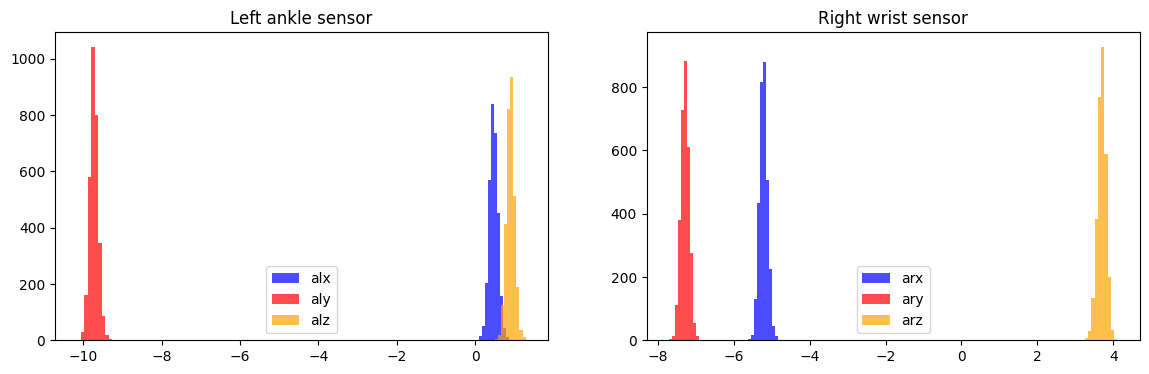

-------------------Sitting and relaxing (1 min) - g-------------------


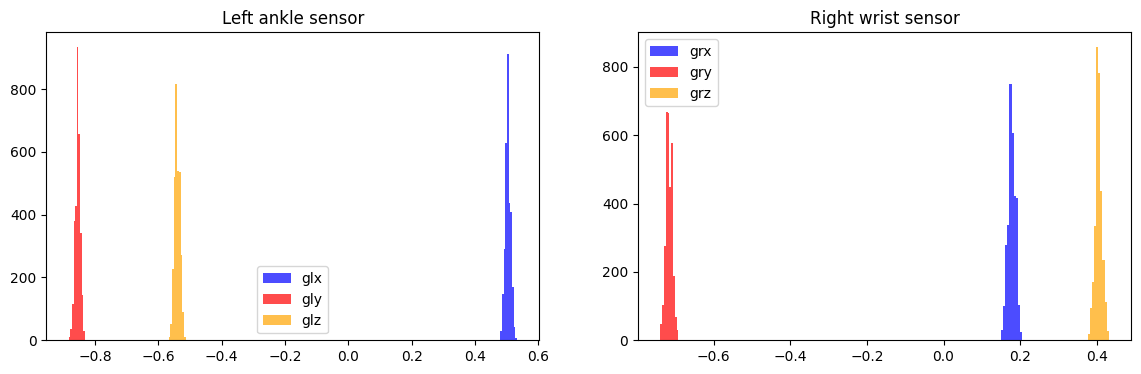

-------------------Lying down (1 min) - a-------------------


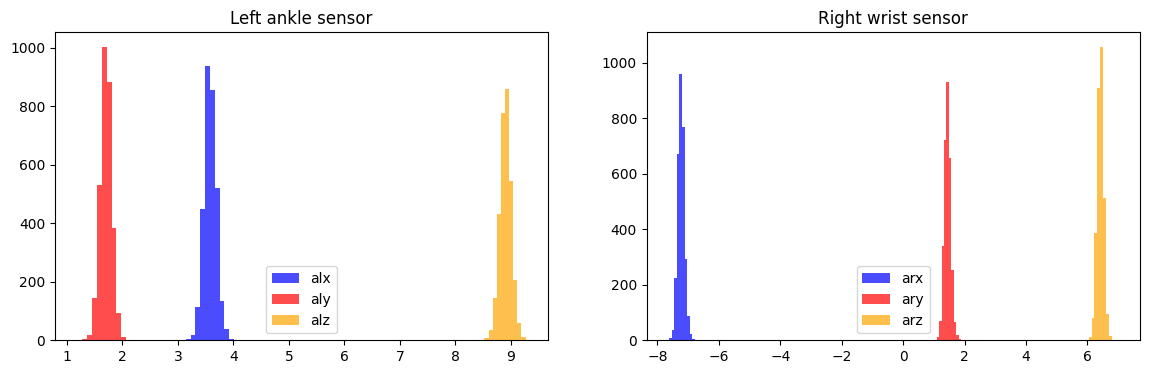

-------------------Lying down (1 min) - g-------------------


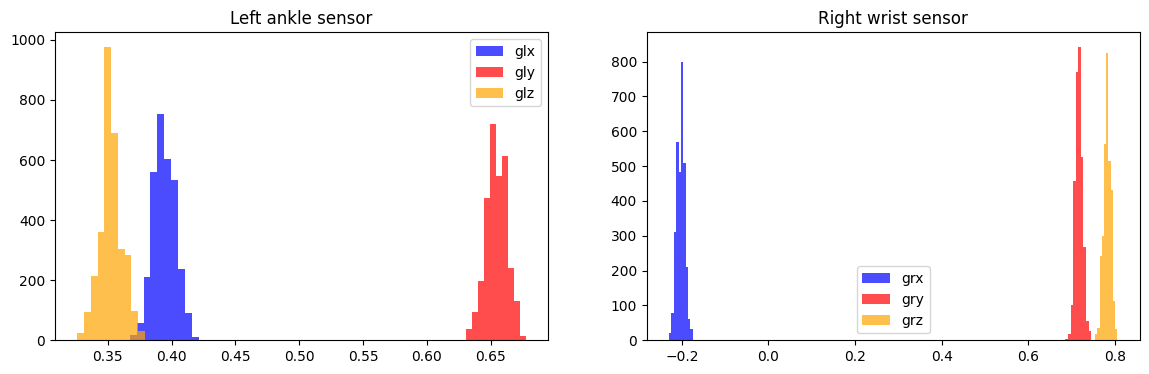

-------------------walking (1 min) - a-------------------


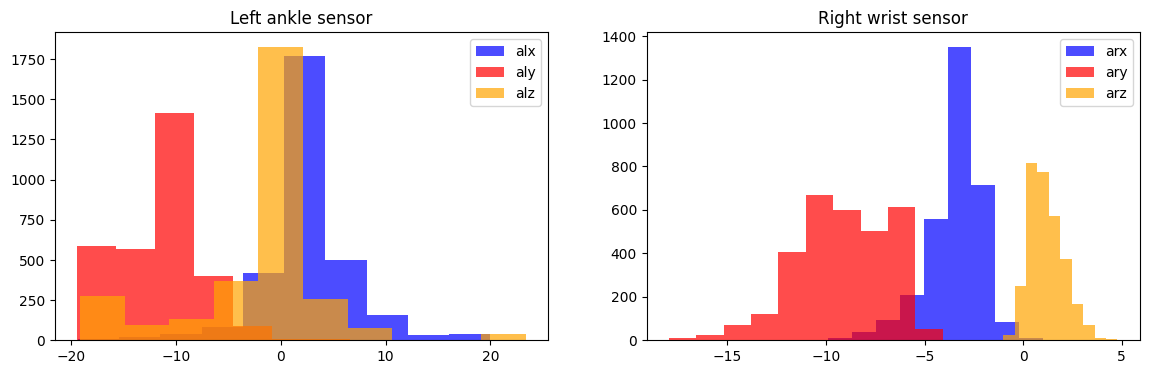

-------------------walking (1 min) - g-------------------


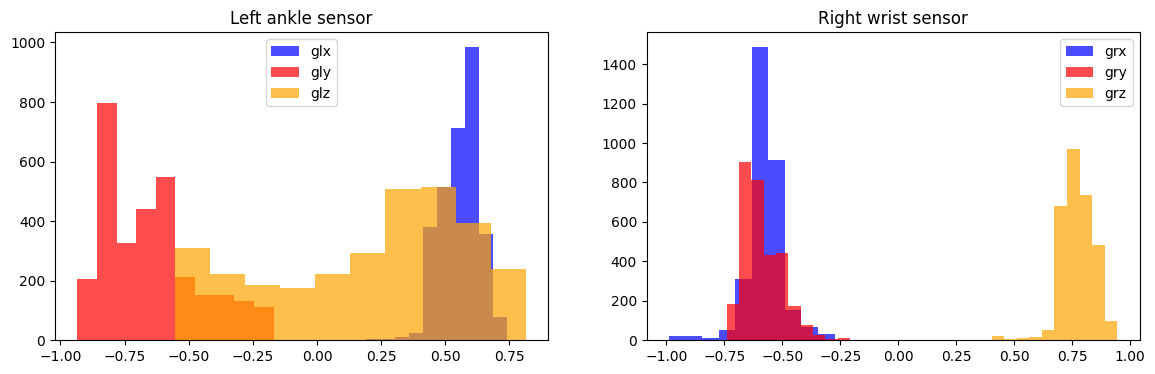

-------------------Climbing stairs (1 min) - a-------------------


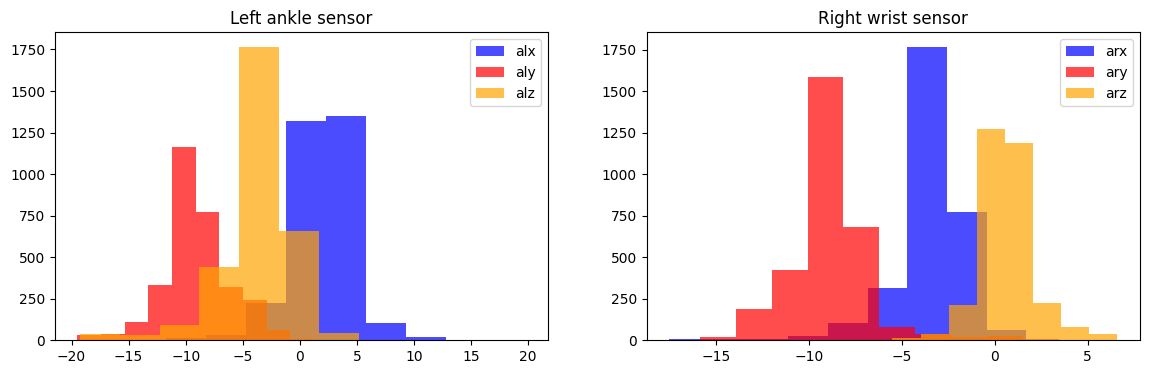

-------------------Climbing stairs (1 min) - g-------------------


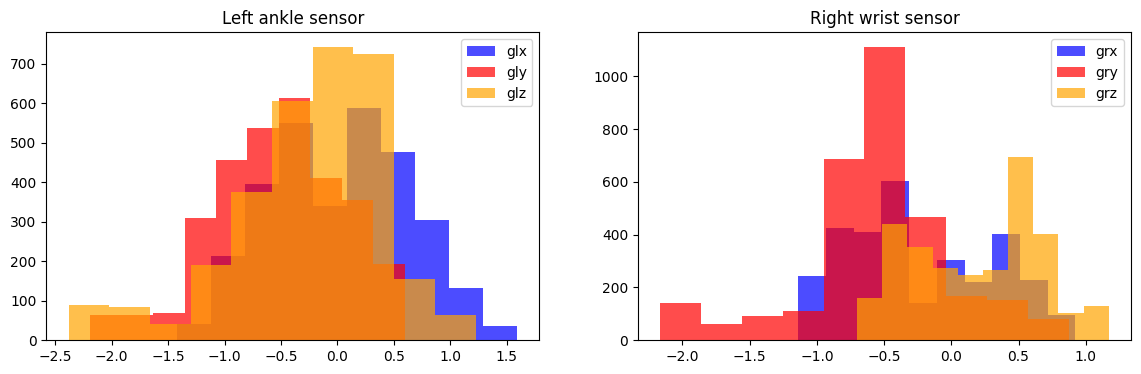

-------------------Waist bends forward (20x) - a-------------------


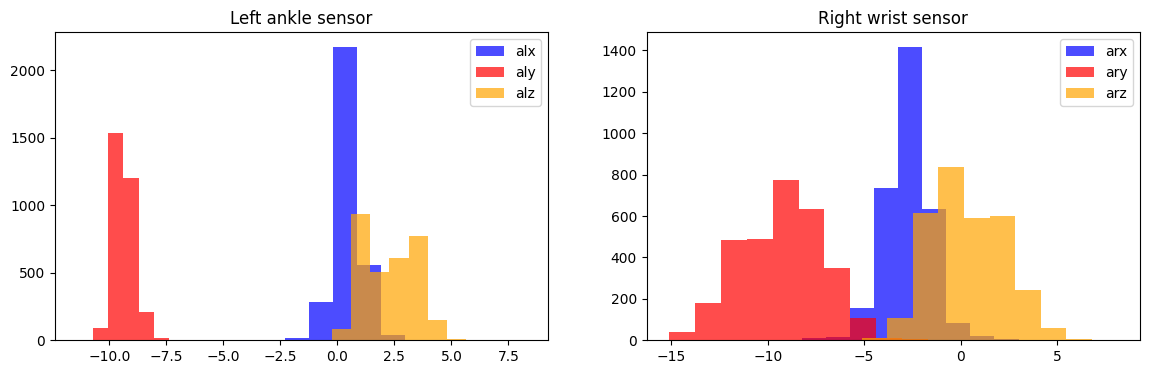

-------------------Waist bends forward (20x) - g-------------------


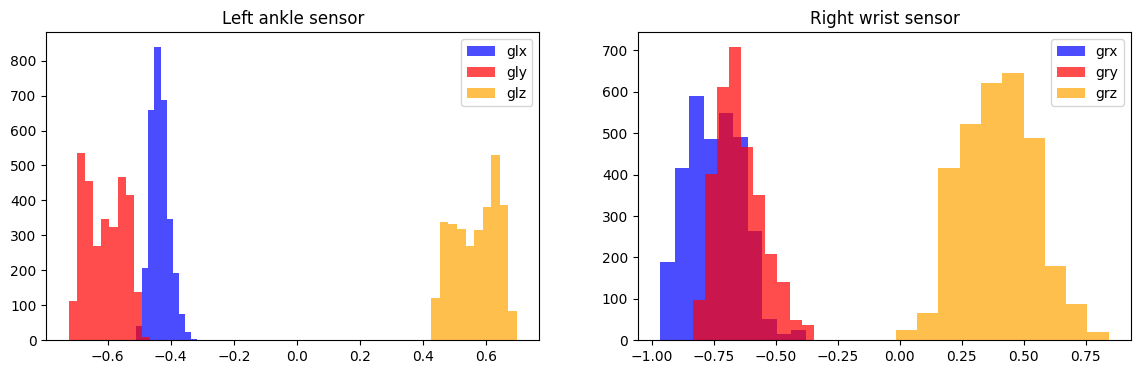

-------------------Frontal elevation of arms (20x) - a-------------------


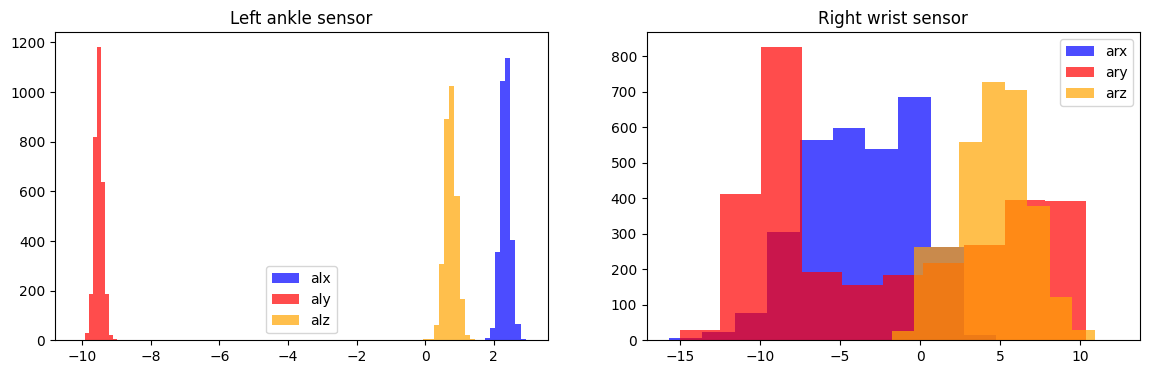

-------------------Frontal elevation of arms (20x) - g-------------------


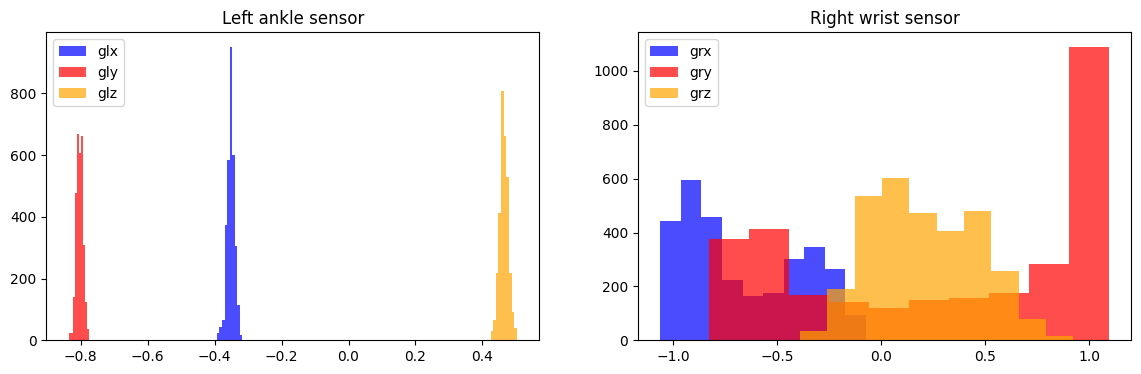

-------------------Knees bending (crouching) (20x) - a-------------------


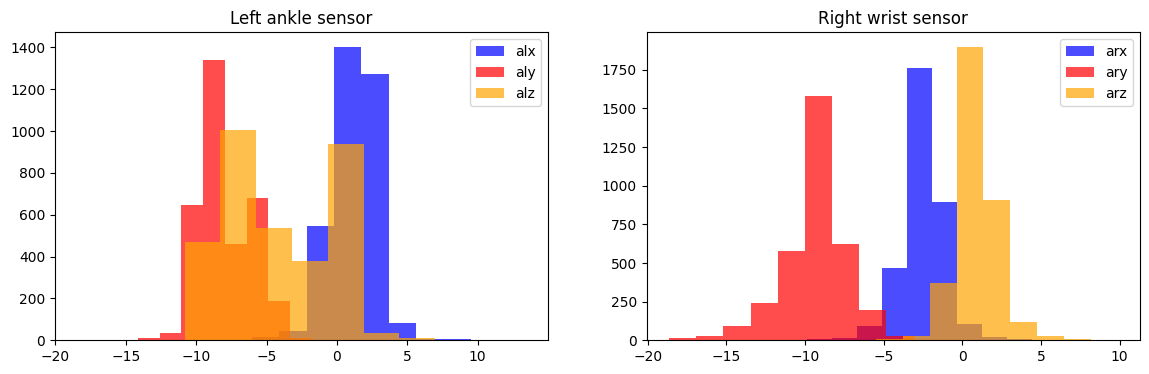

-------------------Knees bending (crouching) (20x) - g-------------------


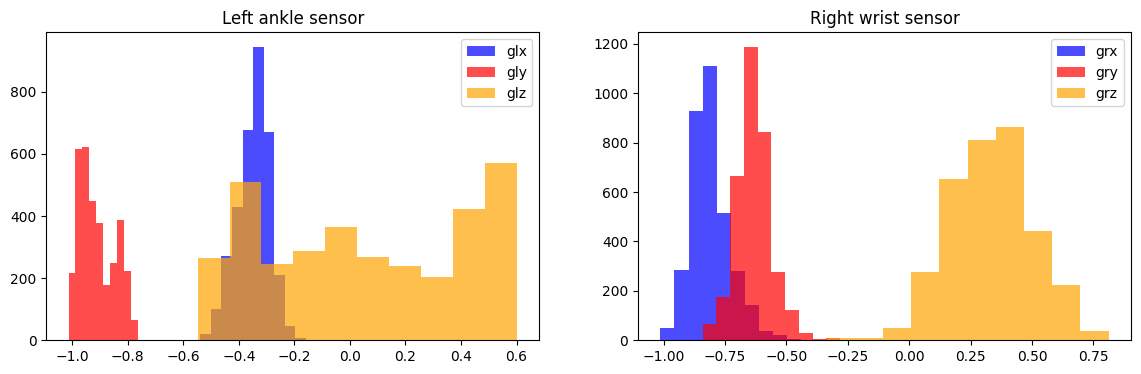

-------------------Cycling (1 min) - a-------------------


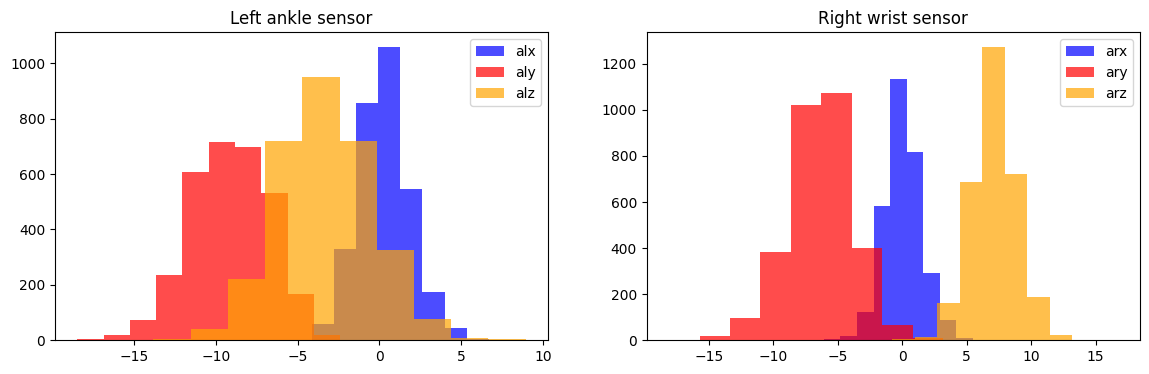

-------------------Cycling (1 min) - g-------------------


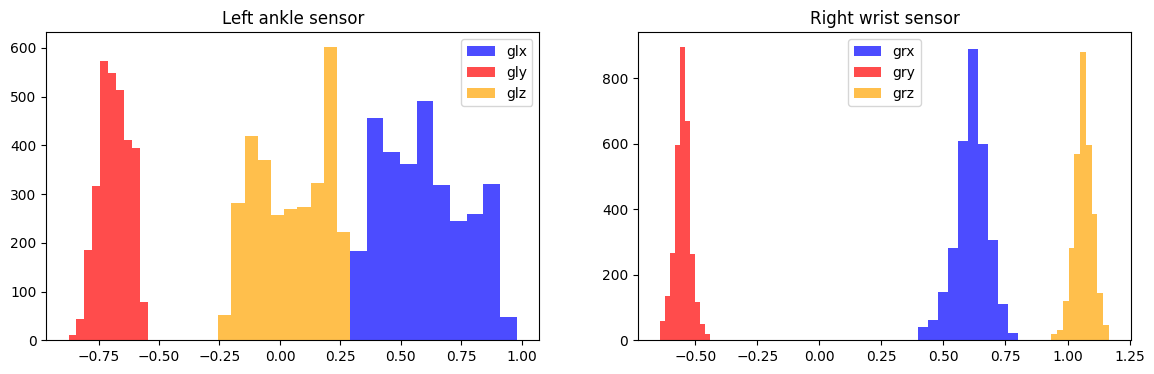

-------------------Jogging (1 min) - a-------------------


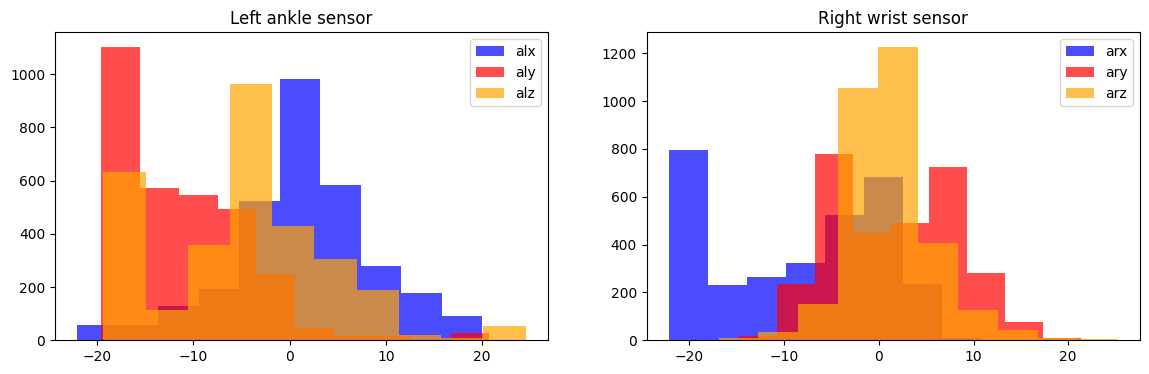

-------------------Jogging (1 min) - g-------------------


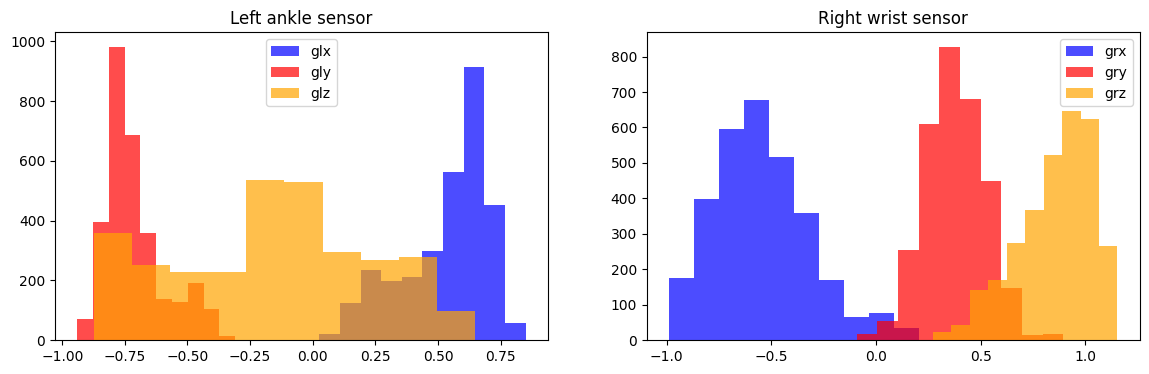

-------------------Running (1 min) - a-------------------


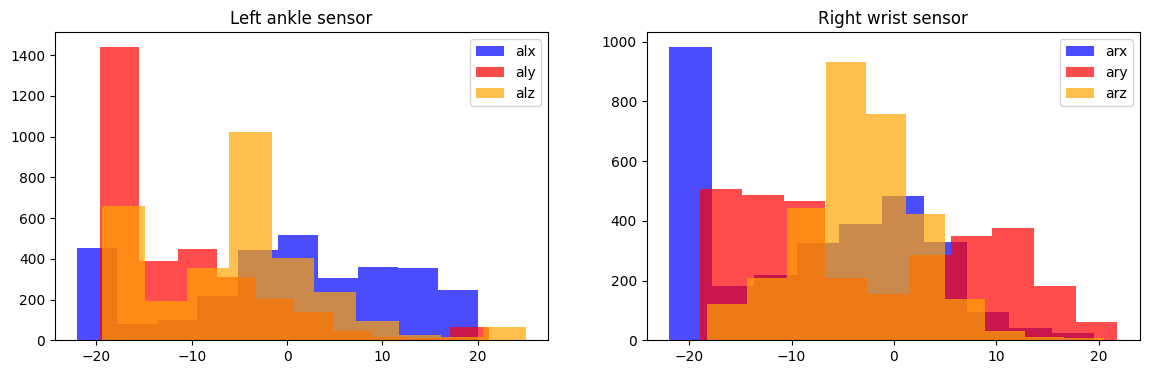

-------------------Running (1 min) - g-------------------


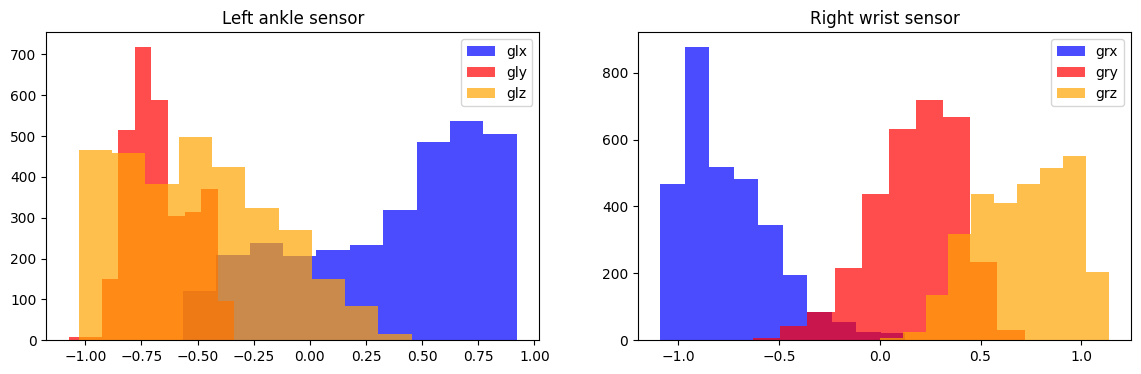

-------------------Jump front & back (20x) - a-------------------


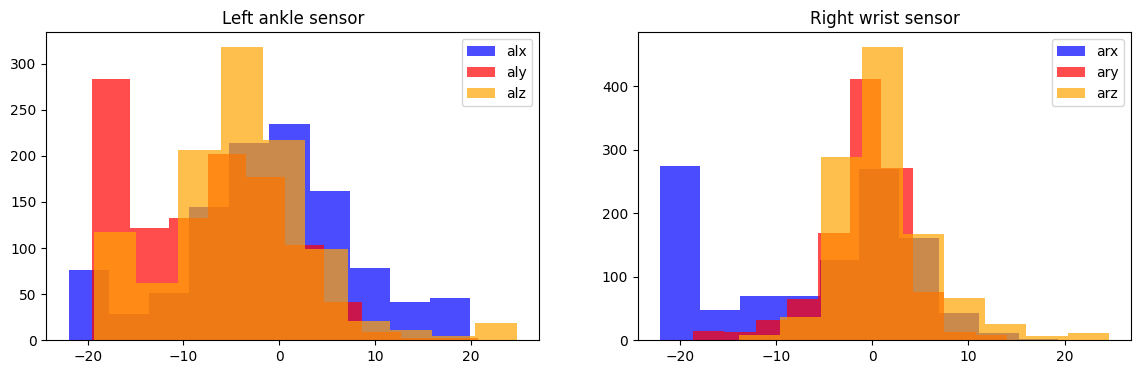

-------------------Jump front & back (20x) - g-------------------


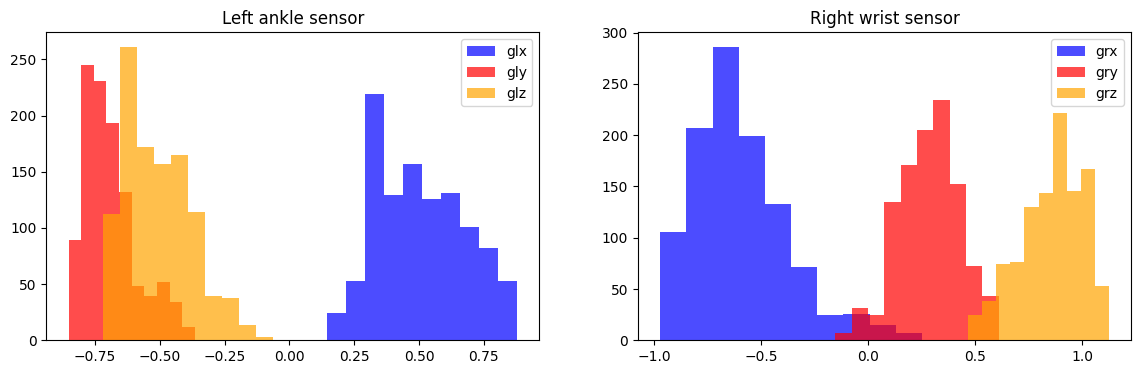

In [16]:
for i in range(1, 13):
    for r in readings:
        print(f"-------------------{activity_label[i]} - {r}-------------------")
        plt.figure(figsize=(14, 4))

        plt.subplot(1, 2, 1)
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "lx"],
                 color='blue', alpha=0.7, label=r + "lx")
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "ly"],
                 color='red', alpha=0.7, label=r + "ly")
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "lz"],
                 color='orange', alpha=0.7, label=r + "lz")
        plt.title("Left ankle sensor")
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "rx"],
                 color='blue', alpha=0.7, label=r + "rx")
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "ry"],
                 color='red', alpha=0.7, label=r + "ry")
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "rz"],
                 color='orange', alpha=0.7, label=r + "rz")
        plt.title("Right wrist sensor")
        plt.legend()

        plt.show()

In [17]:
df['Activity'] = df['Activity'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12], [
    'None',
    'Standing still (1 min)',
    'Sitting and relaxing (1 min)',
    'Lying down (1 min)',
    'Walking (1 min)',
    'Climbing stairs (1 min)',
    'Waist bends forward (20x)',
    'Frontal elevation of arms (20x)',
    'Knees bending (crouching) (20x)',
    'Cycling (1 min)',
    'Jogging (1 min)',
    'Running (1 min)',
    'Jump front & back (20x)'
])

In [18]:
df['Activity']

736661                        None
83683                         None
26946                         None
130007                        None
428958                        None
                    ...           
1213641    Jump front & back (20x)
1213642    Jump front & back (20x)
1213643    Jump front & back (20x)
1213644    Jump front & back (20x)
1213645    Jump front & back (20x)
Name: Activity, Length: 383195, dtype: object

In [19]:
df.Activity.value_counts()

Activity
None                               40000
Standing still (1 min)             30720
Sitting and relaxing (1 min)       30720
Lying down (1 min)                 30720
Walking (1 min)                    30720
Cycling (1 min)                    30720
Climbing stairs (1 min)            30720
Running (1 min)                    30720
Jogging (1 min)                    30720
Frontal elevation of arms (20x)    29441
Knees bending (crouching) (20x)    29337
Waist bends forward (20x)          28315
Jump front & back (20x)            10342
Name: count, dtype: int64

<Axes: ylabel='count'>

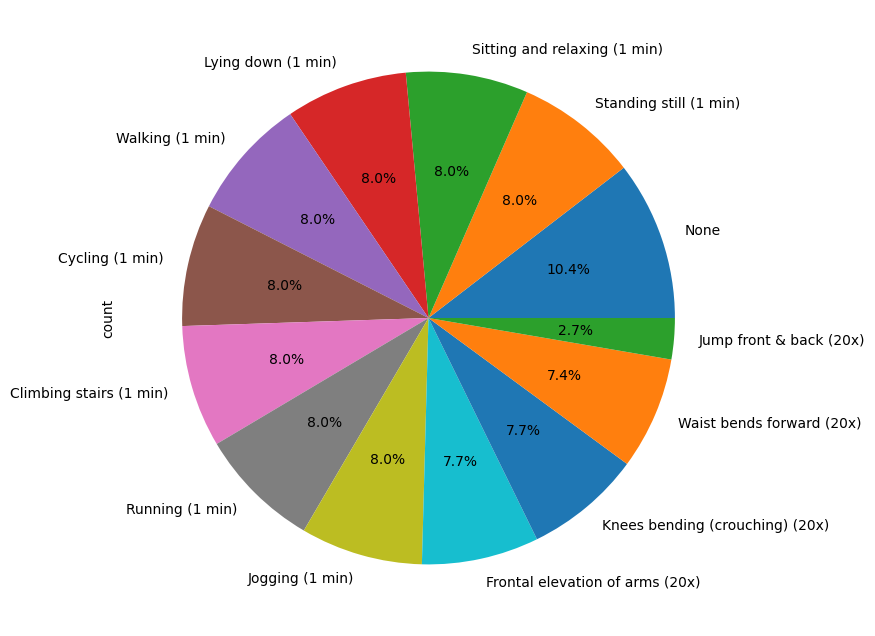

In [20]:
plt.figure(figsize=(10,8))
round(df['Activity'].value_counts()/df.shape[0]*1100,2).plot.pie(autopct='%2.1f%%')

In [21]:
df1 = df.copy()

for feature in df1.columns[:-1]:
    if feature == 'Activity':
        continue
    lower_range = np.quantile(df1[feature], 0.01)
    upper_range = np.quantile(df1[feature], 0.99)
    print(feature, "range:", lower_range, "to", upper_range)

    df1 = df1.drop(df1[(df1[feature] > upper_range) | (df1[feature] < lower_range)].index, axis=0)
    print(df1.shape)

alx range: -11.472 to 19.214
(375533, 14)
aly range: -19.363 to 1.821
(368033, 14)
alz range: -18.61 to 11.834
(360676, 14)
glx range: -0.76067 to 0.80148
(353565, 14)
gly range: -1.0394 to 0.96811
(346566, 14)
glz range: -1.0963 to 0.82711
(339729, 14)
arx range: -21.464 to 6.8261
(332947, 14)
ary range: -18.68154 to 10.824000000000002
(326288, 14)
arz range: -6.424313 to 10.319
(319763, 14)
grx range: -1.0059 to 0.89412
(313615, 14)
gry range: -1.1253 to 0.92608
(307530, 14)
grz range: -0.66379 to 1.1164
(301533, 14)


In [22]:
df1

alx       aly      alz      glx      gly      glz       arx  \
26946    2.01710 -19.36200 -9.48960 -0.36549 -0.92120 -0.39686  -4.41170   
130007   6.43290  -6.72480 -1.18860 -0.10946 -0.82552 -0.73281   0.14675   
428958   1.47400 -10.70300  0.97959  0.33395 -0.21201 -0.88802   2.29070   
27409    2.63120  -9.44940  0.60593  0.53061 -0.59850  0.44794  -3.67820   
67288    0.33828  -9.71700 -1.39910 -0.46568 -0.81051  0.28487  -9.45090   
...          ...       ...      ...      ...      ...      ...       ...   
1213636 -0.19979  -0.93484  2.55540  0.63080 -0.52533 -0.67976  -4.02120   
1213637 -0.33315  -1.23710 -2.91940  0.63822 -0.42777 -0.74853  -2.25150   
1213640  6.77570 -15.07500  7.39740  0.61967 -0.33771 -0.82711  -2.27970   
1213641 -2.48730 -19.23300  3.46140  0.61967 -0.33771 -0.82711  -8.23480   
1213645 -2.36980 -19.30000 -4.23870  0.71058 -0.27017 -0.75442 -21.17300   

               ary       arz      grx       gry       grz  \
26946     1.233100 -0.688340 -0.88235 -0.059548 -0.482760   
130007  -13.630000 -0.014841 -0.43922 -0.798770  0.737070   
428958   -5.960400  4.962400  0.62745 -1.039000 -0.004310   
27409    -9.043800  0.620730 -0.52745 -0.618070  0.771550   
67288     3.664700  0.474900 -0.68431  0.767970 -0.375000   
...            ...       ...      ...       ...       ...   
1213636  -0.082645  0.735450 -0.45882 -1.000000  0.122840   
1213637  -0.414790  0.520930 -0.41765 -1.037000  0.088362   
1213640  -2.358900  2.111200 -0.41765 -1.037000  0.088362   
1213641  -4.965200  2.480900 -0.43725 -1.018500  0.079741   
1213645 -14.291000 -0.131230 -0.42549 -1.037000  0.084052   

                        Activity    subject  
26946                       None   subject1  
130007                      None   subject1  
428958                      None   subject4  
27409                       None   subject1  
67288                       None   subject1  
...                          ...        ...  
1213636  Jump front & back (20x)  subject10  
1213637  Jump front & back (20x)  subject10  
1213640  Jump front & back (20x)  subject10  
1213641  Jump front & back (20x)  subject10  
1213645  Jump front & back (20x)  subject10  

[301533 rows x 14 columns]

Step 4: Data Processing

In [23]:
le = LabelEncoder()
df['subject'] = le.fit_transform(df['subject'])

In [24]:
df['Activity'] = le.fit_transform(df['Activity'])

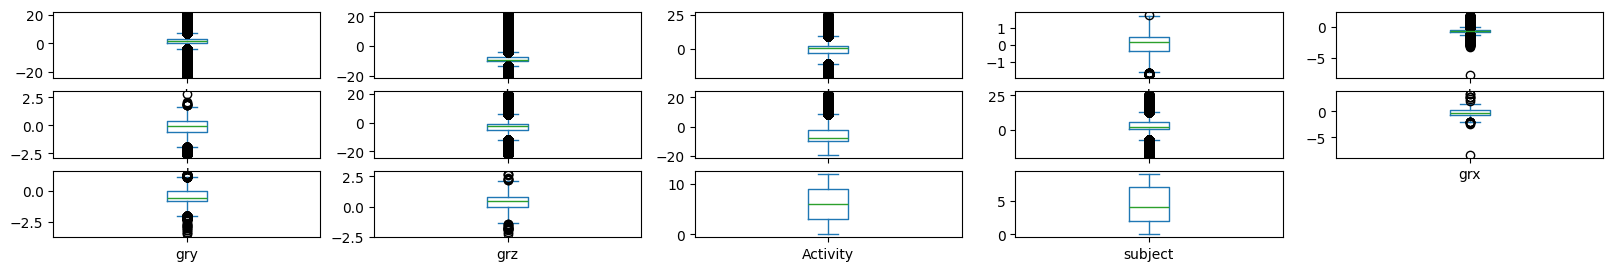

In [25]:
df.plot(kind='box', subplots=True, layout=(5,5), figsize=(20,5))
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# Dropping 'Activity' and 'subject' columns and converting to numpy arrays
X = df.drop(["Activity", "subject"], axis=1).values
y = df["Activity"].values

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Applying RobustScaler to reduce the impact of outliers
ro_scaler = RobustScaler().fit(X_train)
X_train_scaled = ro_scaler.transform(X_train)
X_test_scaled = ro_scaler.transform(X_test)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9714715184918423

Confusion Matrix:
 [[7613    0    1    1    0   13    0   58    0    0    0    0   22]
 [   0 7586    0    0    0    1    0   10    0    0    0    0    0]
 [   0    0 7326    0    0    2    0    1    0    0    0    3    0]
 [   0    0    0 7551    5    0    0   14  171    0    0    0    0]
 [   4    0    0   57 2342    1    0  100   50    0    0    0    1]
 [   5    1    4    0    3 7155    0   26    0    0    0    8    1]
 [   0    0    0    0    0    0 7801    1    0    0    0    0    0]
 [ 273  174  125  128  101  175   92 8023  149  148  116  179  294]
 [   0    0    0  115    6    0    0   16 7444    0    0    0    2]
 [   0    0    0    0    0    0    0    1    0 7671    0    0    0]
 [   0    0    0    0    0    0    0    2    0    0 7753    0    0]
 [   1    0    6    0    0    3    0    7    0    0    1 7176    0]
 [   1    0    0    0    0    0    0   51    1    0    0    2 7625]]

Classification Report:
               precision    recall  f1-sco